In [1]:
# linear algebra & data science
import numpy as np
import pandas as pd

# graphing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('metabolite_induction_analysis_20180901.csv', sep=",", index_col=0)

df.shape

(1131, 81)

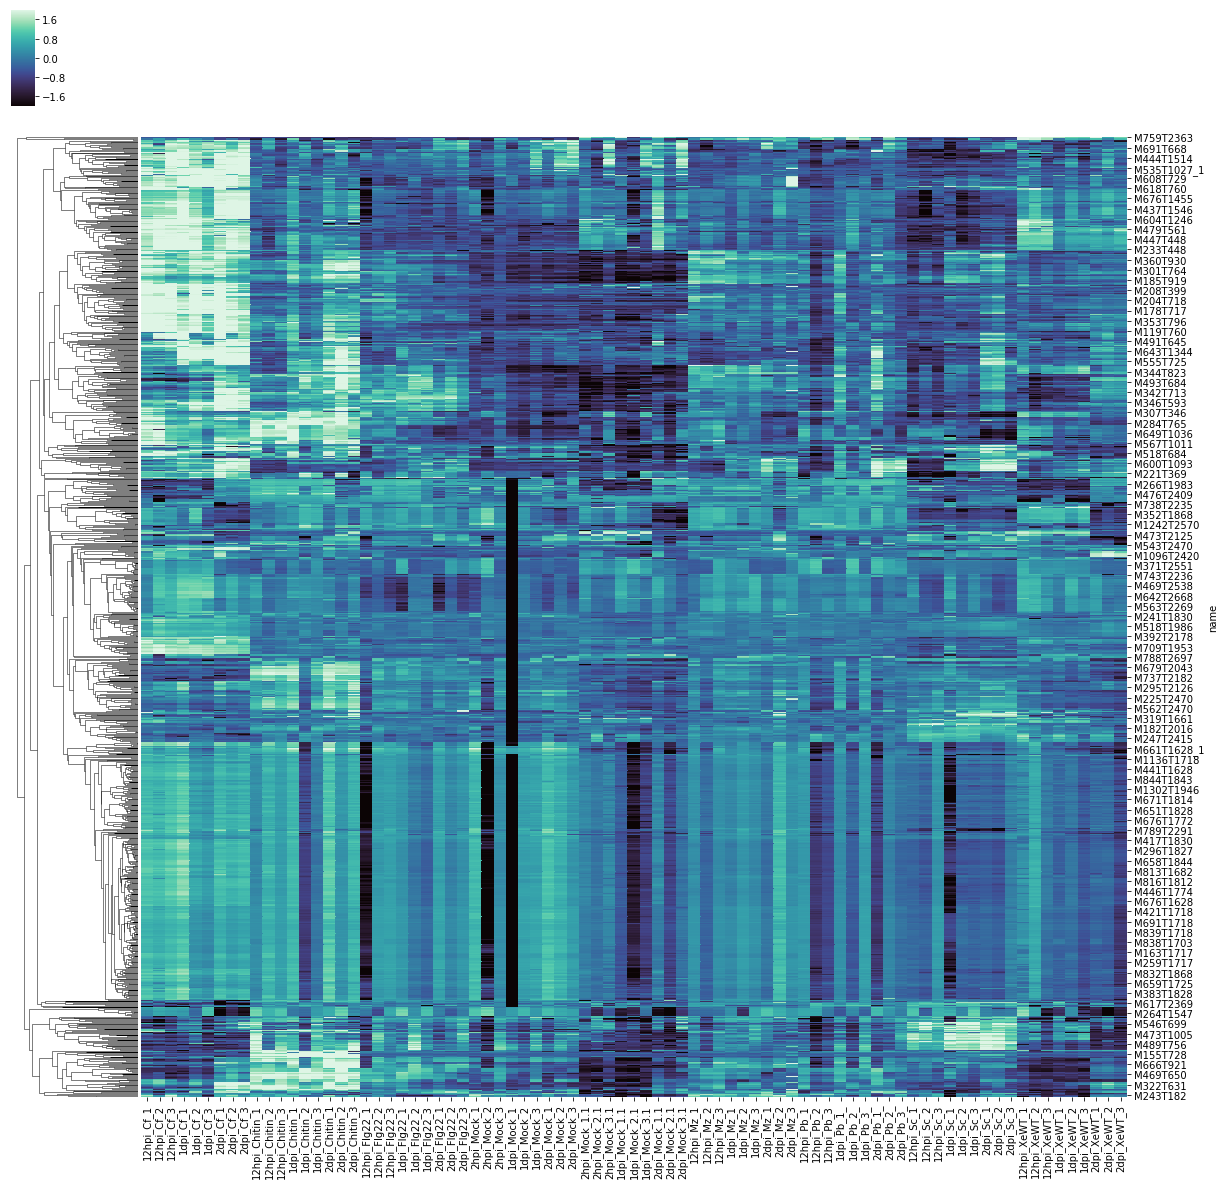

In [3]:
# define a co
cm = sns.clustermap(np.log(df + 1), vmin=-2, vmax=2, figsize=(20,20), cmap="mako", col_cluster=False, z_score=0)
        
plt.savefig('base_heatmap.png', 
            dpi=None,
            facecolor='w',
            edgecolor='w',
            orientation='portrait',
            papertype=None, 
            format=None,
            transparent=False,
            bbox_inches=None,
            pad_inches=0.1,
            frameon=None)

In [4]:
# semi-manual annotation of the samples in the heatmap
color_groups = []
for col in df.columns:
    if '_Cf_' in col:
        color_groups.append('red')
    elif '_Chitin_' in col:
        color_groups.append('yellow')
    elif '_Flg22_' in col:
        color_groups.append('yellow')
    elif '_Mock_' in col:
        color_groups.append('green')
    elif '_Mz_' in col:
        color_groups.append('red')
    elif '_Pb_' in col:
        color_groups.append('blue')
    elif '_Sc_' in col:
        color_groups.append('blue')
    elif '_XeWT_' in col:
        color_groups.append('blue')
        
# annotation of rows corresponding to falcarindiol 
fcn_rows = []
for idx, row in enumerate(df.index):
    if 'M283T2030' in row:
        fcn_rows.append(idx)
    if 'M225T2033' in row:
        fcn_rows.append(idx)

color_rows = ['black'] * len(df.index)
for fcn_row in fcn_rows:
    color_rows[fcn_row] = 'red'


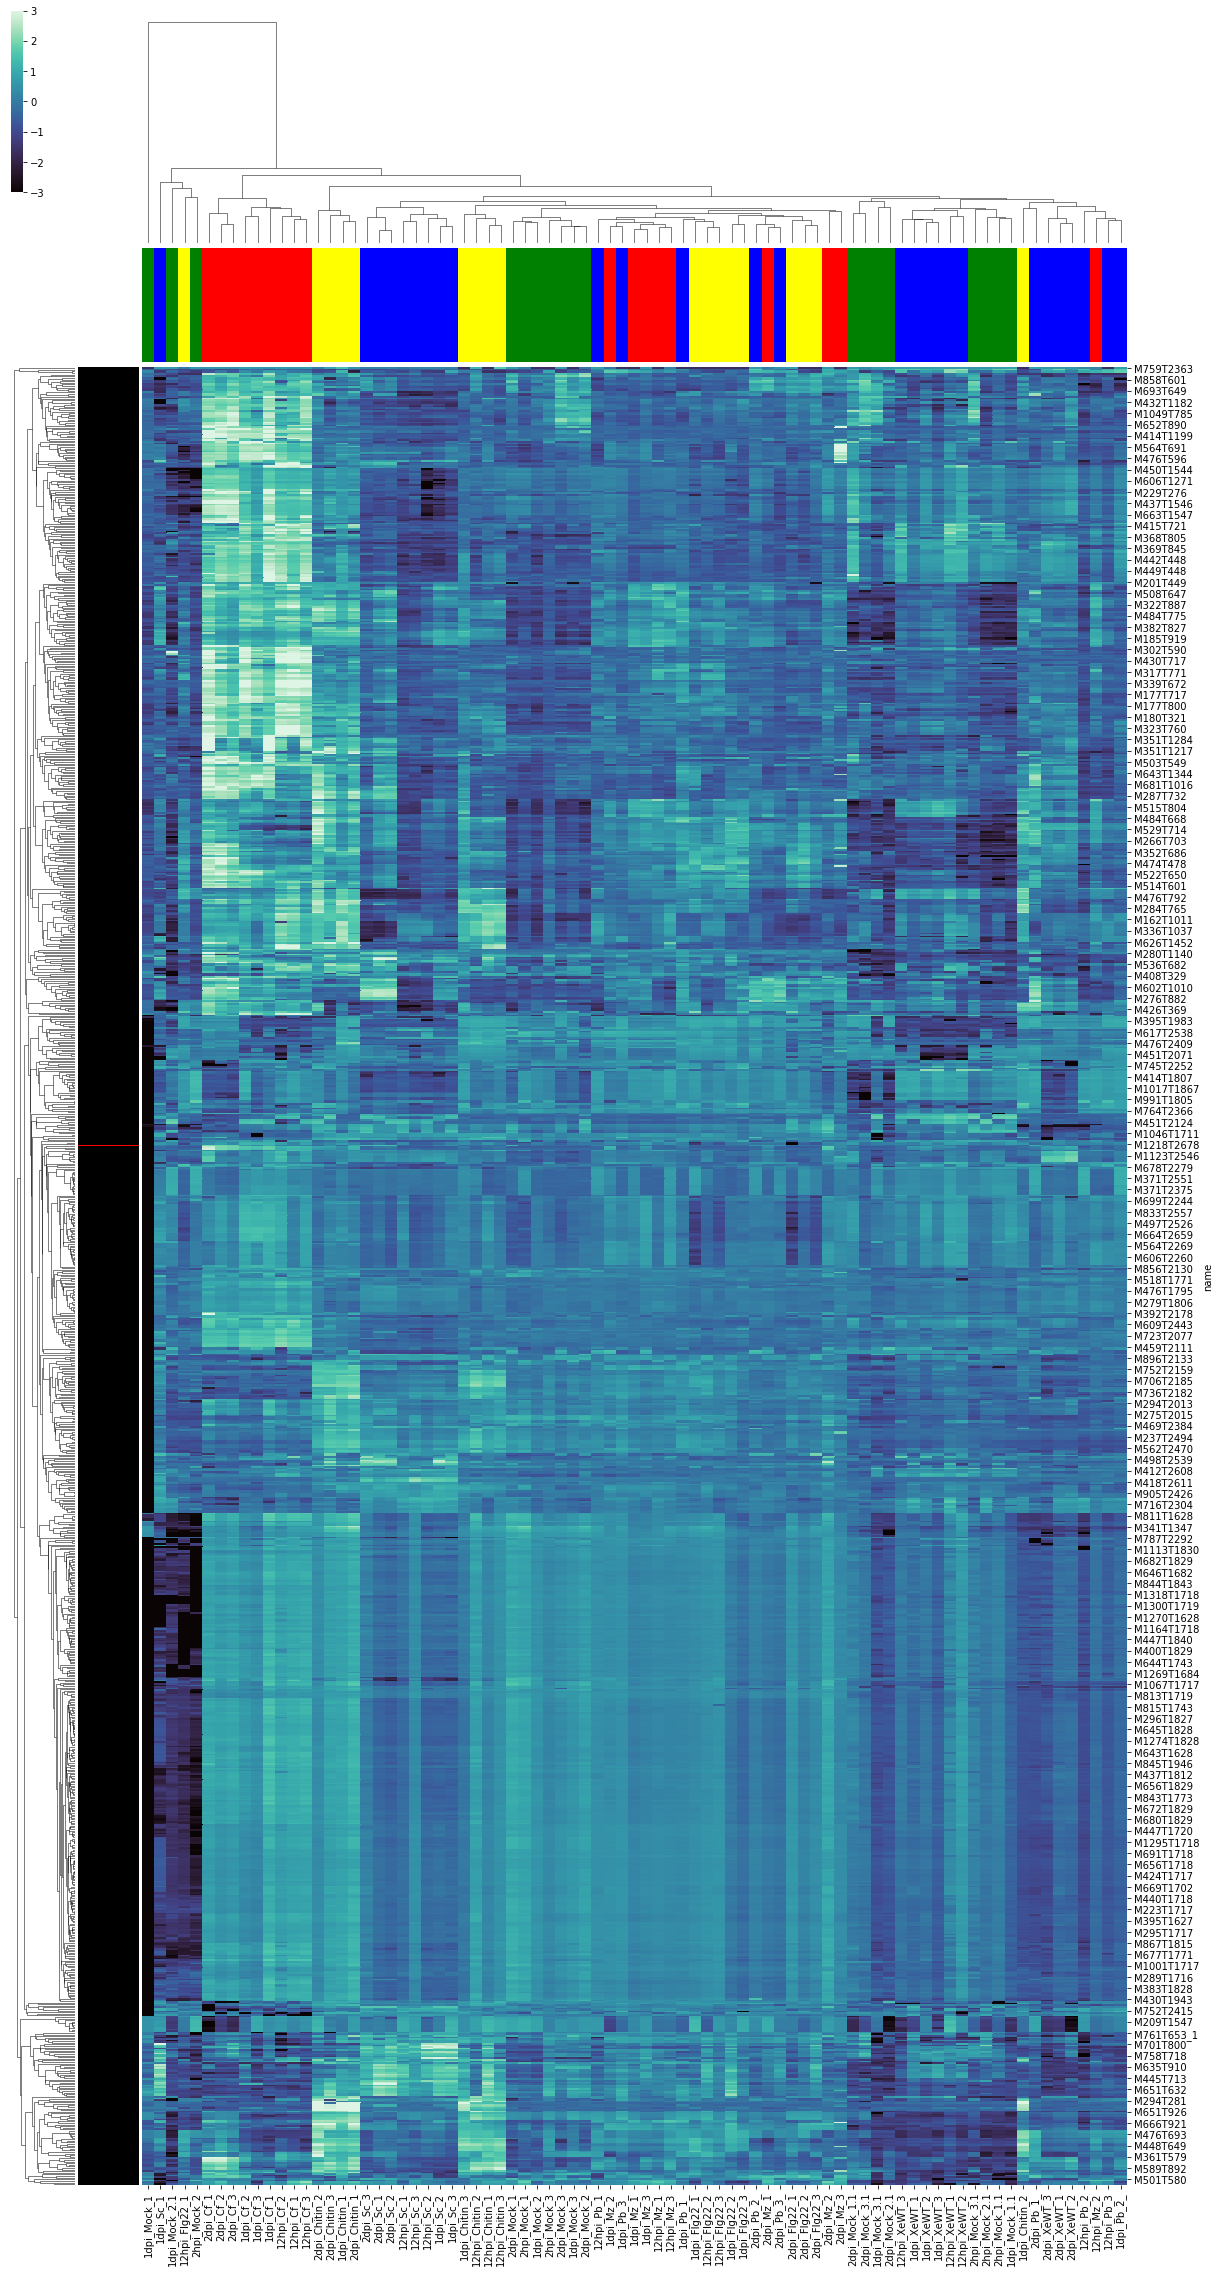

In [5]:
cm = sns.clustermap(np.log(df + 1),
                    vmin=-3,
                    vmax=3,
                    figsize=(20, 40),
                    cmap="mako",
                    z_score=0,
                    col_colors=color_groups,
                    row_colors=color_rows)
        
plt.savefig('annotated_heatmap.png', 
            dpi=None,
            facecolor='w',
            edgecolor='w',
            orientation='portrait',
            papertype=None, 
            format=None,
            transparent=False,
            bbox_inches=None,
            pad_inches=0.1,
            frameon=None)